# Projektuppgift 1 - Kontinuerlig balk
*Tobias Ericsson, David Neinhardt*  
*2025-03-27*  
*MTM026*  

## Uppgift 2
*Författa en mycket kortfattad rapport. Rapporten skall innehålla (för båda näten)*  
- *Bild på deformerad balk och angiven största utböjning.*
- *Tvärkraft- och momentdiagram.*
- *Bild över största böjspänningen σ längs med balken (största värddet ska vara markerat).*
- *Beräknade värden på stödkrafterna.*

-
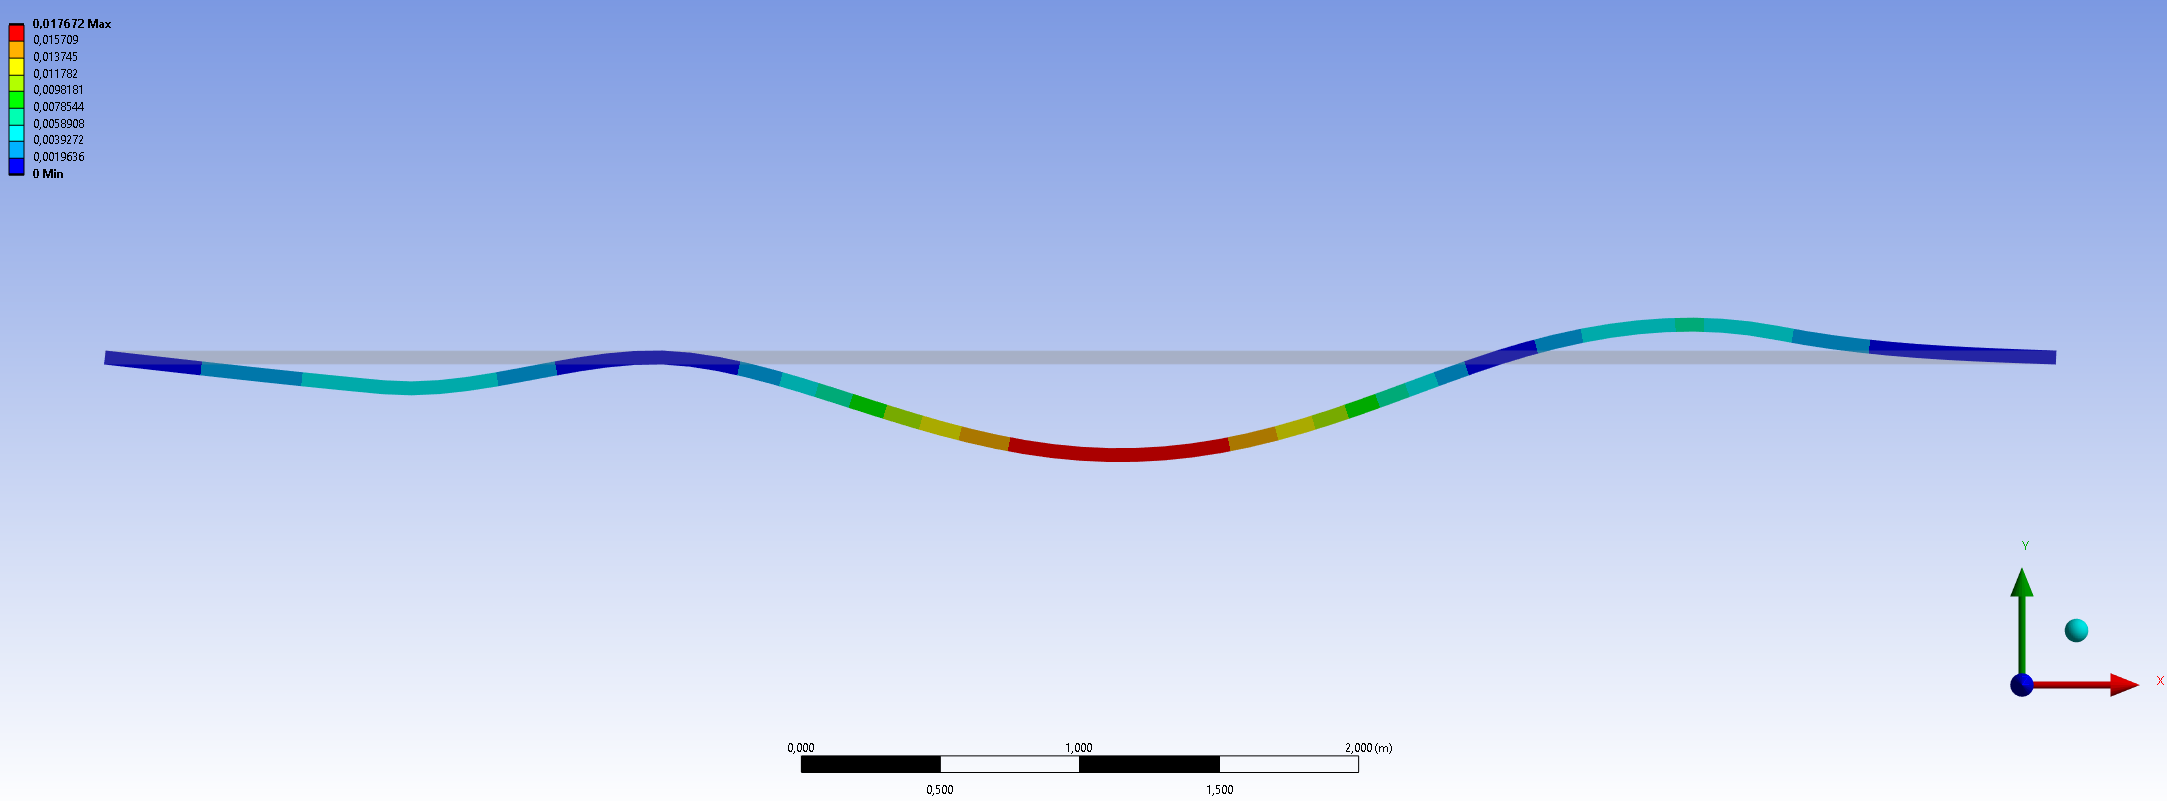

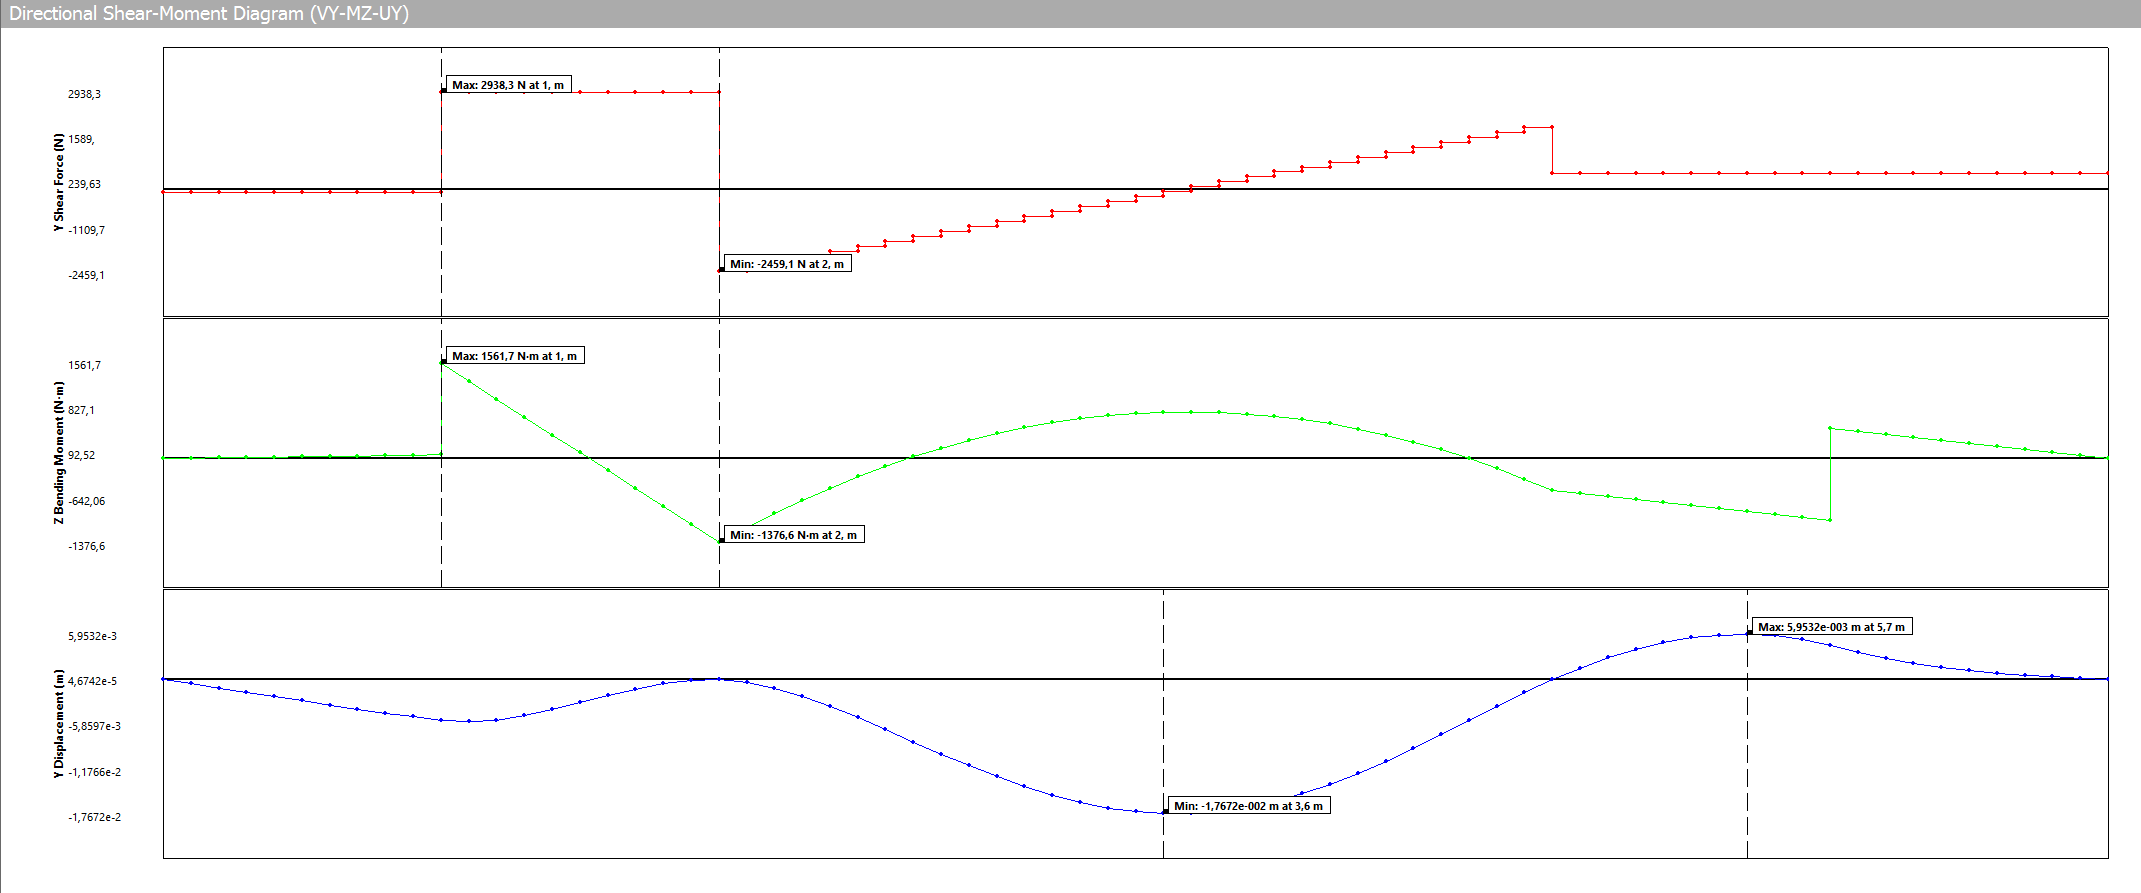

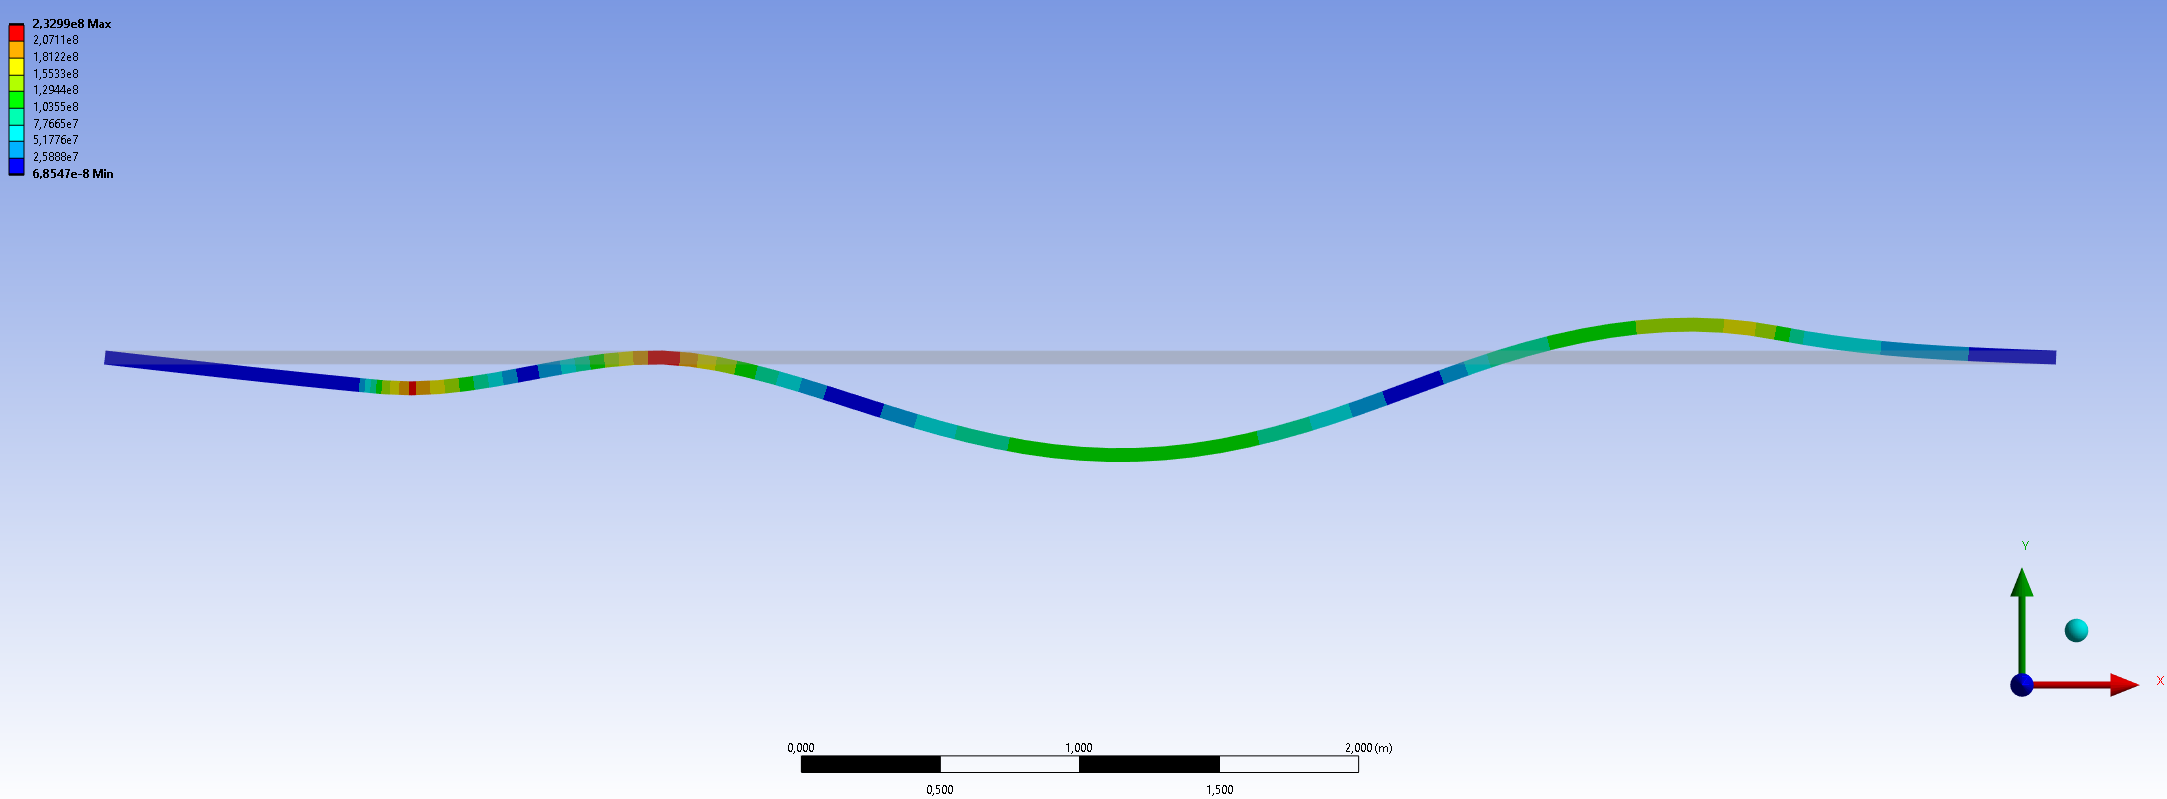

r1 = (0, 61.68, 0)
r2 = (0, 5472.4, 0)
r3 = (0, 1478.2, 0)
r4 = (0, 478.77,0)
-

## Uppgift 3  
*Presentera en tabell innehållande värden på utböjning i frihetsgrad 3 och 9 samt alla reaktionskrafter. Tabellen ska innehålla värden från ANSYS och från Pythonlösningen (enligt exempeltabellen nedan). Syftet med tabellen är att tydligt visa att de två modellerna ger liknande resultat och att vi därför kan ha större förtroende att vår FE-modell är korrektuppställd.*

### Bibliotek Introducerade  
- **Pylab**: Innehåller bibliotek som numpy och plotlib som kan vara nödvändiga i uppgiften
- **Sympy**: Är biblioteket som kommer att användas för majoriteten av alla beräkningsmetoder.
- **MTM026**: Ett special tillämpat bibliotek med nödvändiga funktioner som underlättar beräkningarnas gång

In [50]:
import pylab as pl
import sympy as sp
from mtm026 import *

Vi ansätter alla våra givna värden till respektive variabel som vi sedan kommer använda i beräkningarna. Vi definierar även alla reaktionskrafter/moment och försjutningar/böjningar.

In [ ]:
P = 3000        #[N]
q0 = 1500       #[N/m]
M = 1500        #[Nm]
L1 = 1          #[m]
L2 = 3          #[m]
a = 0.05        #[m]
t = 0.002       #[m]
E = 200000000   #[Pa]
v = 0.3

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12 = sp.symbols('r1:13')    # Reaktionskrafter
a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12 = sp.symbols('a1:13')    # Försjutningar


...

In [ ]:

Iz_1 =  2*(a*t**3)/12       # yttröghetsmoment för rektangel H/L
Iz_2 =  2*((a-t)*t**3)/12   # yttröghetsmoment för rektangel Ö/N
_z = (a/2-t/2)              # Avståndet till masscentrum, z-axeln
A = a**2                    # Arean för rektangeln

I =  Iz_1 + Iz_2 + _z*A     # Totala yttröghetsmomentet

In [ ]:
K = sp.zeros(12,12)
f = sp.zeros(12, 1)

ke1 = Ke_balk(E*I, L1)
ke3 = Ke_balk(E*I, L2)
ke2 = ke1
ke4 = ke1
ke5 = ke1

assem(K, ke1, dofs=[1,2,3,4])
assem(K, ke2, dofs=[3,4,5,6])
assem(K, ke3, dofs=[5,6,7,8])
assem(K, ke4, dofs=[7,8,9,10])
assem(K, ke5, dofs=[9,10,11,12])

display(K)

Matrix([
[ 144000.3136,       72000.1568, -144000.3136,       72000.1568,                 0,                 0,                 0,                0,            0,                0,            0,                0],
[  72000.1568, 48000.1045333333,  -72000.1568, 24000.0522666667,                 0,                 0,                 0,                0,            0,                0,            0,                0],
[-144000.3136,      -72000.1568,  288000.6272,                0,      -144000.3136,        72000.1568,                 0,                0,            0,                0,            0,                0],
[  72000.1568, 24000.0522666667,            0, 96000.2090666667,       -72000.1568,  24000.0522666667,                 0,                0,            0,                0,            0,                0],
[           0,                0, -144000.3136,      -72000.1568,  149333.658548148, -64000.1393777778, -5333.34494814815, 8000.01742222222,            0,                0,